<a href="https://colab.research.google.com/github/Abhineetsahay/DMDW-assignment/blob/main/DMDW_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

This notebook demonstrates a machine learning to predict heart disease based on a given dataset.

## 1. Data Loading and Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

First, let's load the dataset.

In [ ]:
heart_df = pd.read_csv('/content/heart (1).csv')

print("Dataset Shape:", heart_df.shape)
print("\nFirst 5 rows:")
display(heart_df.head())
print("\nDataset Info:")
print(heart_df.info())
print("\nMissing values:")
print(heart_df.isnull().sum())
print("\nTarget distribution:")
print(heart_df['HeartDisease'].value_counts())
print("\nBasic statistics:")
display(heart_df.describe())

Dataset Shape: (918, 12)

First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exerc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 2. Exploratory Data Analysis (EDA)

Let's visualize the distributions of features and their relationship with the target variable.

### Exploring Numerical Features

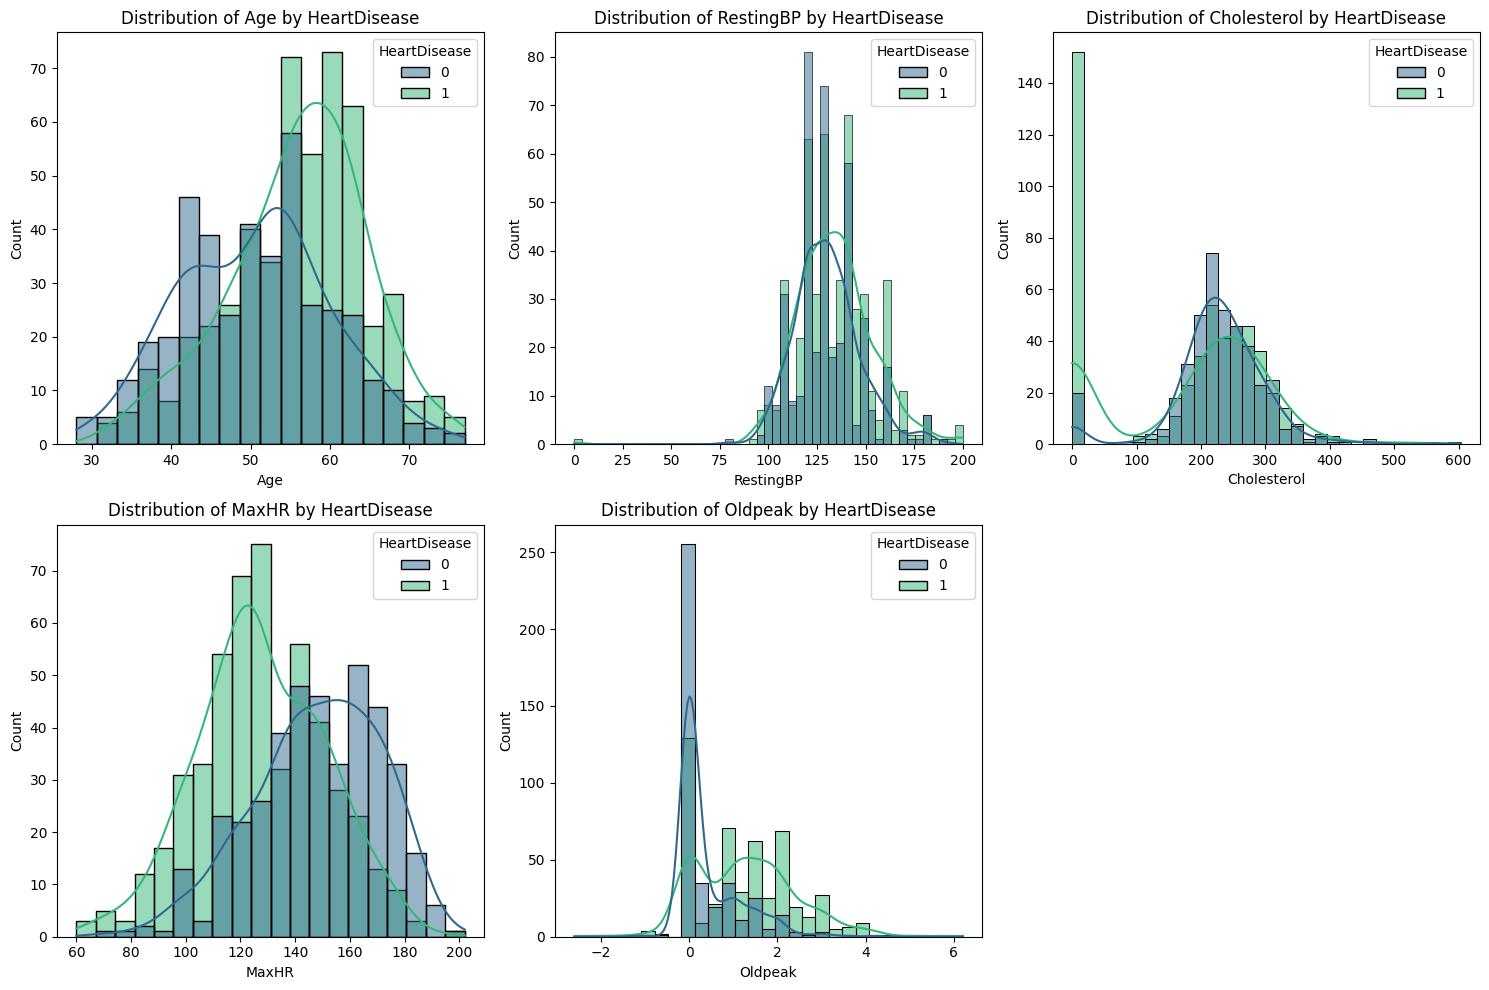

In [ ]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=heart_df, x=col, hue='HeartDisease', kde=True, palette='viridis')
    plt.title(f'Distribution of {col} by HeartDisease')
plt.tight_layout()
plt.show()

### Exploring Categorical Features

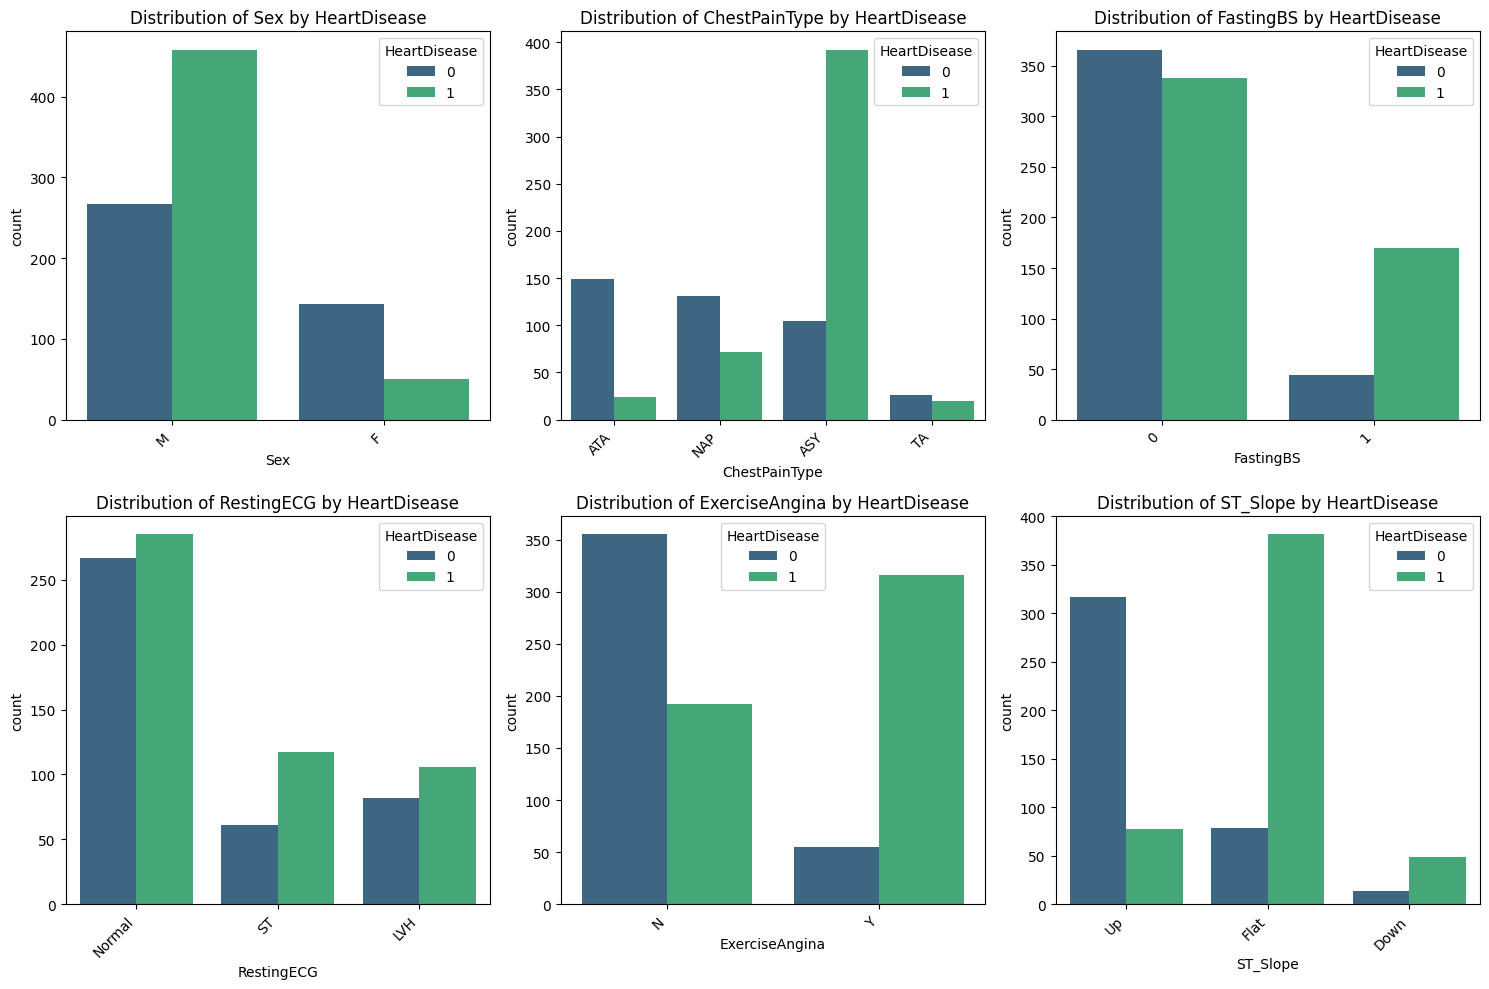

In [ ]:
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=heart_df, x=col, hue='HeartDisease', palette='viridis')
    plt.title(f'Distribution of {col} by HeartDisease')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlation Heatmap

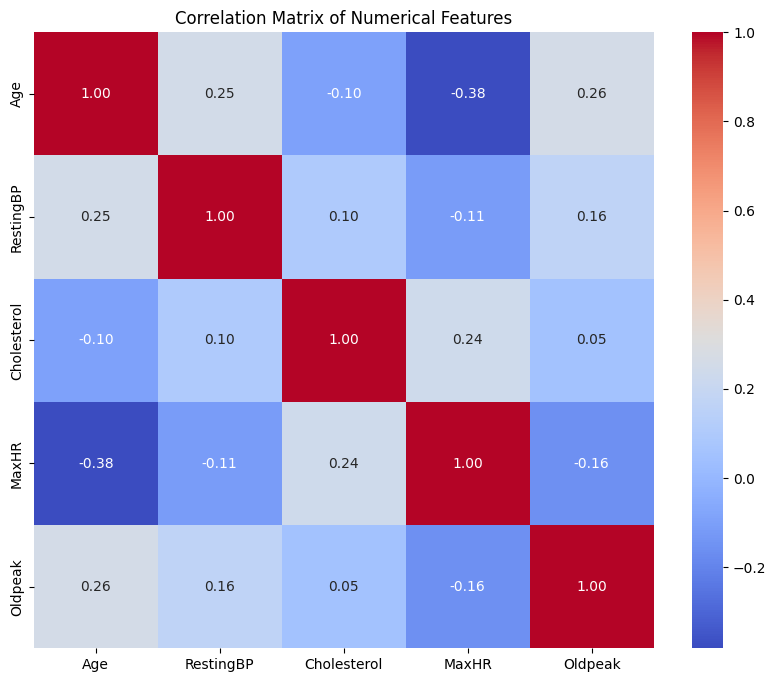

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 3. Data Preprocessing

We will encode categorical features and scale numerical features.

In [ ]:
label_encoders = {}
print("\nCategorical Variable Encoding:")
for col in categorical_cols:
    le = LabelEncoder()
    heart_df[col] = le.fit_transform(heart_df[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Categorical Variable Encoding:
Sex: {'F': np.int64(0), 'M': np.int64(1)}
ChestPainType: {'ASY': np.int64(0), 'ATA': np.int64(1), 'NAP': np.int64(2), 'TA': np.int64(3)}
FastingBS: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
RestingECG: {'LVH': np.int64(0), 'Normal': np.int64(1), 'ST': np.int64(2)}
ExerciseAngina: {'N': np.int64(0), 'Y': np.int64(1)}
ST_Slope: {'Down': np.int64(0), 'Flat': np.int64(1), 'Up': np.int64(2)}

Data Split:
Training set: 734 samples
Test set: 184 samples
Features: 11


## 4. Model Training and Evaluation

Let's train and evaluate several classification models.

### Logistic Regression


LOGISTIC REGRESSION MODEL
Logistic Regression Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184


Confusion Matrix:
[[66 16]
 [ 7 95]]


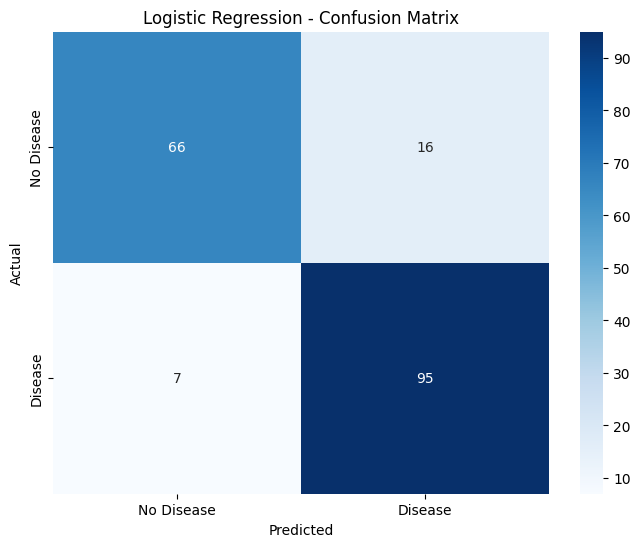

In [ ]:
print("\n" + "=" * 60)
print("LOGISTIC REGRESSION MODEL")
print("=" * 60)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print(f"\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Disease', 'Disease'],
           yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Random Forest Classifier


RANDOM FOREST CLASSIFIER
Random Forest Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


Confusion Matrix:
[[69 13]
 [10 92]]


Text(0.5, 36.72222222222221, 'Predicted')

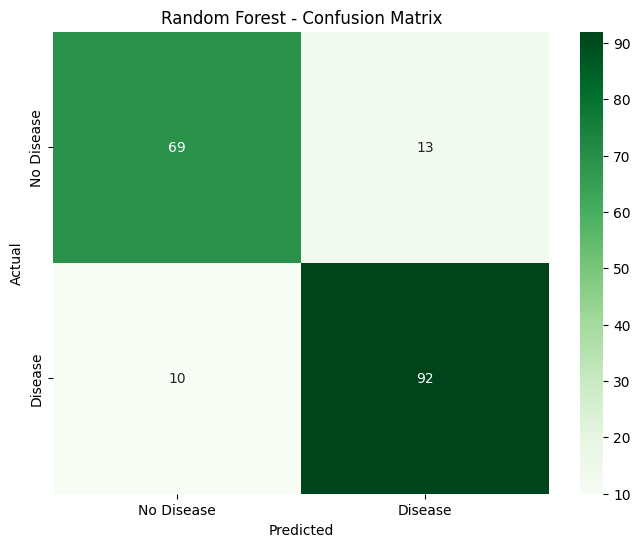

In [ ]:
print("\n" + "=" * 60)
print("RANDOM FOREST CLASSIFIER")
print("=" * 60)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
           xticklabels=['No Disease', 'Disease'],
           yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')



### Support Vector Machine (SVM)


SUPPORT VECTOR MACHINE (SVM)
SVM Accuracy: 0.8859

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.86        82
           1       0.86      0.94      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184


Confusion Matrix:
[[67 15]
 [ 6 96]]


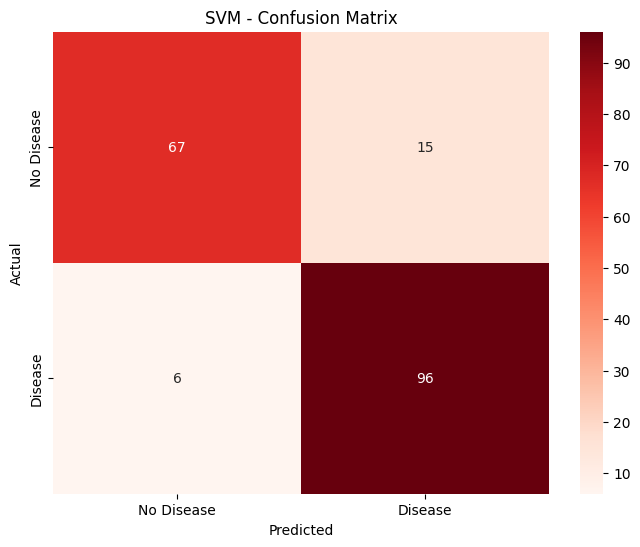

In [ ]:
print("\n" + "=" * 60)
print("SUPPORT VECTOR MACHINE (SVM)")
print("=" * 60)
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print(f"\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
           xticklabels=['No Disease', 'Disease'],
           yticklabels=['No Disease', 'Disease'])
plt.title('SVM - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 5. Model Comparison

Let's compare the performance of the trained models.


5. MODEL COMPARISON SUMMARY
                 Model  Accuracy
2                  SVM   0.88587
0  Logistic Regression   0.87500
1        Random Forest   0.87500


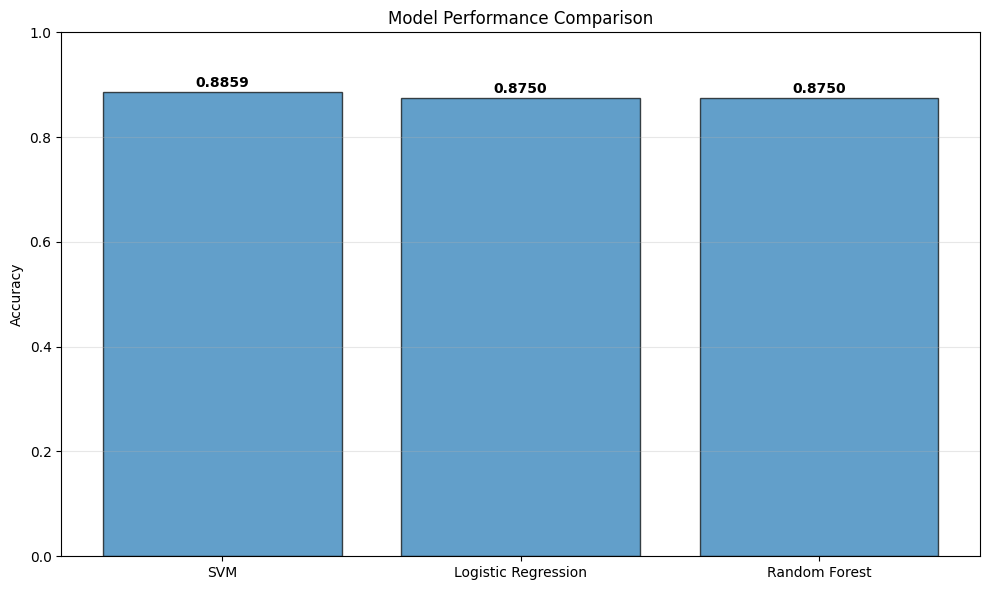

In [ ]:
print("\n" + "=" * 60)
print("5. MODEL COMPARISON SUMMARY")
print("=" * 60)

models_comparison = (
    pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
        'Accuracy': [lr_accuracy, rf_accuracy, svm_accuracy]
    })
    .sort_values('Accuracy', ascending=False)
)

print(models_comparison)

plt.figure(figsize=(10, 6))
bars = plt.bar(models_comparison['Model'], models_comparison['Accuracy'],
               alpha=0.7, edgecolor='black')

plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

